In [5]:
import cv2
from deepface.commons import functions, distance as dst
import matplotlib.pyplot as plt
import ArcFace
import numpy as np

In [6]:
model = ArcFace.loadModel()
model.load_weights("arcface_weights.h5")
print("ArcFace expects ",model.layers[0].input_shape[1:]," inputs")
print("and it represents faces as ", model.layers[-1].output_shape[1:]," dimensional vectors")

ArcFace expects  []  inputs
and it represents faces as  (512,)  dimensional vectors


## Build ArcFace Model

In [4]:
#Ref: https://github.com/serengil/deepface/blob/master/deepface/basemodels/ArcFace.py
import ArcFace

In [5]:
model = ArcFace.loadModel()

In [6]:
#Ref: https://drive.google.com/uc?id=1LVB3CdVejpmGHM28BpqqkbZP5hDEcdZY
model.load_weights("arcface_weights.h5")

In [7]:
print("ArcFace expects ",model.layers[0].input_shape[1:]," inputs")
print("and it represents faces as ", model.layers[-1].output_shape[1:]," dimensional vectors")

ArcFace expects  []  inputs
and it represents faces as  (512,)  dimensional vectors


In [40]:
target_size = (112, 112)

## Early Stages of Pipeline

A modern face recognition pipeline consists of 4 common stages: detect, align, represent and verify. ArcFace model handles representation. Here, we will apply detection and alignment within deepface.

**Blog post:** [A Modern Face Recognition Pipeline](https://sefiks.com/2020/05/01/a-gentle-introduction-to-face-recognition-in-deep-learning/)

**Vlog:** [How Face Recognition Works with Deep Learning in Python](https://youtu.be/OYialFo7Qo4)

In [43]:
import os
from pathlib import Path

# latest_image = max(Path("C:\\Users\\user\\final\\downloads").glob('*.[jJpP]*[gG]'), key=lambda x: x.stat().st_ctime, default=None)
# # print(latest_image)
# new_path = latest_image.replace("\\","\\\\")
# print(new_path)
# bx1_path = latest_image      #    "bx2" + ".jpg"
# img_path = "C:\\Users\\user\\final\\ArcFace\\local_img"
# img_path_list = os.listdir(img_path )
# # # for i in range (10):
# # #     path_list.append(str(i+1) + ".jpg")
# # print(img_path_list)


latest_image = max(Path("C:\\Users\\user\\final\\downloads").glob('*.[jJpP]*[gG]'), key=lambda x: x.stat().st_ctime, default=None)
# print(latest_image)

# Path 객체를 문자열로 변환하여 replace()를 사용합니다.
new_path = str(latest_image).replace("\\", "\\\\")
print(new_path)

bx1_path = new_path     #    "bx2" + ".jpg"
img_path = "C:\\Users\\user\\final\\ArcFace\\local_img"
print(img_path)
img_path_list = os.listdir(img_path)

C:\\Users\\user\\final\\downloads\\mun.jpg
C:\Users\user\final\ArcFace\local_img


In [44]:
detector_backend = 'opencv'
bx1 = functions.extract_faces(str(bx1_path), target_size = target_size, detector_backend = detector_backend)
img_list_extraction=[]
for i in img_path_list:
    img_list_extraction.append(functions.extract_faces(img_path +'\\{}'.format(i), target_size = target_size, detector_backend = detector_backend,enforce_detection=False))
     
     
# detector_backend = 'opencv'

# # Path 객체를 문자열로 변환
# bx1 = functions.extract_faces(str(bx1_path), target_size = target_size, detector_backend = detector_backend)

# img_list_extraction = []
# for i in img_path_list:
#     # Path 객체를 문자열로 변환
#     img_list_extraction.append(functions.extract_faces(str(img_path / i), target_size=target_size, detector_backend=detector_backend, enforce_detection=False))
    
    
# img1 = functions.extract_faces(img1_path, target_size = target_size, detector_backend = detector_backend)
# img2 = functions.extract_faces(img2_path, target_size = target_size, detector_backend = detector_backend)
# img3 = functions.extract_faces(img3_path, target_size = target_size, detector_backend = detector_backend)


In [10]:
fig = plt.figure(figsize=(20, 20))

# Display the first face image from img1
face_img1, bbox1, _ = img1[0]
face_img1 = np.squeeze(face_img1, axis=0)  # Remove the batch dimension
ax1 = fig.add_subplot(1, 6, 1)
plt.axis('off')
plt.imshow(face_img1[:, :, ::-1])

# Display the first face image from img2
face_img2, bbox2, _ = img2[0]
face_img2 = np.squeeze(face_img2, axis=0)  # Remove the batch dimension
ax2 = fig.add_subplot(1, 6, 2)
plt.axis('off')
plt.imshow(face_img2[:, :, ::-1])

# face_img3, bbox3, _ = img3[0]
# face_img3 = np.squeeze(face_img3, axis=0)  # Remove the batch dimension
# ax3 = fig.add_subplot(1, 6, 3)
# plt.axis('off')
# plt.imshow(face_img3[:, :, ::-1])

# face_img4, bbox4, _ = img4[0]
# face_img4 = np.squeeze(face_img4, axis=0)  # Remove the batch dimension
# ax4 = fig.add_subplot(1, 6, 4)
# plt.axis('off')
# plt.imshow(face_img4[:, :, ::-1])


# face_img5, bbox5, _ = img5[0]
# face_img5 = np.squeeze(face_img5, axis=0)  # Remove the batch dimension
# ax5 = fig.add_subplot(1, 6, 5)
# plt.axis('off')
# plt.imshow(face_img5[:, :, ::-1])

# face_img6, bbox6, _ = img6[0]
# face_img6 = np.squeeze(face_img6, axis=0)  # Remove the batch dimension
# ax6 = fig.add_subplot(1, 6, 5)
# plt.axis('off')
# plt.imshow(face_img6[:, :, ::-1])

# face_img7, bbox7, _ = img7[0]
# face_img7 = np.squeeze(face_img7, axis=0)  # Remove the batch dimension
# ax5 = fig.add_subplot(1, 6, 5)
# plt.axis('off')
# plt.imshow(face_img5[:, :, ::-1])

# plt.show()


NameError: name 'img1' is not defined

<Figure size 2000x2000 with 0 Axes>

## Represent and verify

ArcFace is responsible for representing faces as 512 dimensional vectors

We will find distance between embeddings to verify they are same person or different persons

In [17]:
metric = 'euclidean'

In [18]:
def findThreshold(metric):
    if metric == 'cosine':
        return 0.6871912959056619
    elif metric == 'euclidean':
        return 4.1591468986978075
    elif metric == 'euclidean_l2':
        return 1.1315718048269017

In [19]:
def verify(img1, img2):
    
    #representation
    
    img1_array = np.array([face_img for face_img, _, _ in img1])
    img2_array = np.array([face_img for face_img, _, _ in img2])
    
    img1_array = np.squeeze(img1_array, axis=1)
    img2_array = np.squeeze(img2_array, axis=1)

    # Representation
    img1_embedding = model.predict(img1_array)[0]
    img2_embedding = model.predict(img2_array)[0]

    if metric == 'cosine':
        distance = dst.findCosineDistance(img1_embedding, img2_embedding)
    elif metric == 'euclidean':
        distance = dst.findEuclideanDistance(img1_embedding, img2_embedding)
    elif metric == 'euclidean_l2':
        distance = dst.findEuclideanDistance(dst.l2_normalize(img1_embedding), dst.l2_normalize(img2_embedding))
    
    #------------------------------
    #verification
    
    threshold = findThreshold(metric)
    
    global cert
    
    if distance <= threshold:
        print("they are same person")
        cert = True
    else:
        print("they are different persons")
    
    print("Distance is ",round(distance, 2)," whereas as expected max threshold is ",round(threshold, 2))
    
    
   
    
    #------------------------------
    display
    
    fig = plt.figure()
    
    ax1 = fig.add_subplot(1,2,1)
    plt.axis('off')
    plt.imshow(img1_array[0][:,:,::-1])
    
    ax2 = fig.add_subplot(1,2,2)
    plt.axis('off')
    plt.imshow(img2_array[0][:,:,::-1])
    
    plt.show()
    

## True positive pairs

In [ ]:
verify(img2, img5)

NameError: name 'img2' is not defined

1/1 [==============================] - 0s 120ms/step
they are same person
Distance is  1.06  whereas as expected max threshold is  1.13


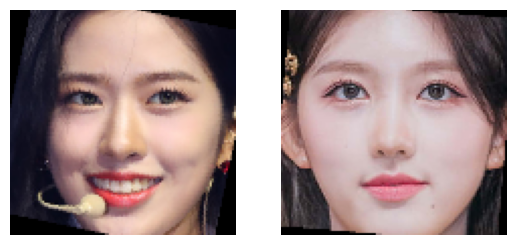

1/1 [==============================] - 0s 85ms/step
they are different persons
Distance is  1.22  whereas as expected max threshold is  1.13


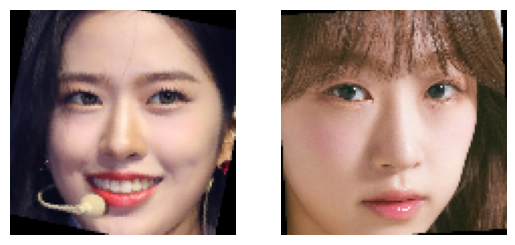

1/1 [==============================] - 0s 101ms/step
they are different persons
Distance is  1.39  whereas as expected max threshold is  1.13


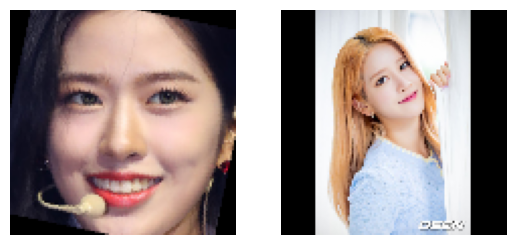

1/1 [==============================] - 0s 100ms/step
they are different persons
Distance is  1.17  whereas as expected max threshold is  1.13


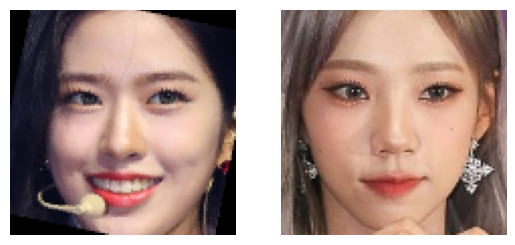

1/1 [==============================] - 0s 83ms/step
they are different persons
Distance is  1.4  whereas as expected max threshold is  1.13


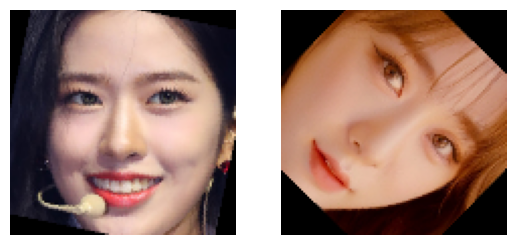

1/1 [==============================] - 0s 88ms/step
they are different persons
Distance is  1.41  whereas as expected max threshold is  1.13


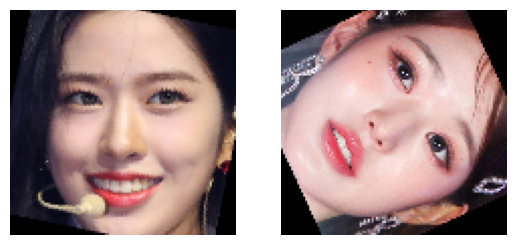

1/1 [==============================] - 0s 133ms/step
they are same person
Distance is  0.9  whereas as expected max threshold is  1.13


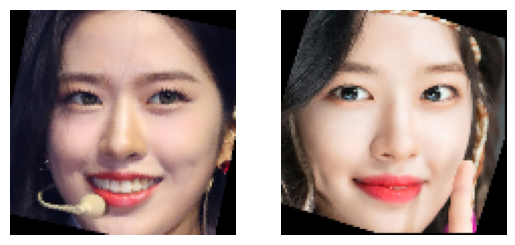

1/1 [==============================] - 0s 82ms/step
they are different persons
Distance is  1.25  whereas as expected max threshold is  1.13


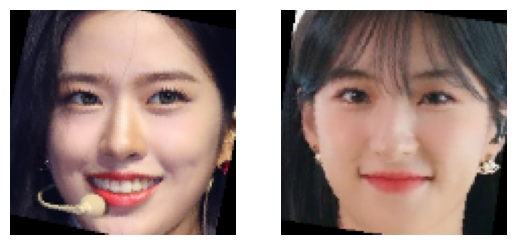

1/1 [==============================] - 0s 83ms/step
they are different persons
Distance is  1.18  whereas as expected max threshold is  1.13


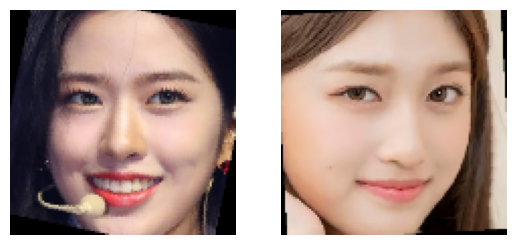

1/1 [==============================] - 0s 81ms/step
they are different persons
Distance is  1.18  whereas as expected max threshold is  1.13


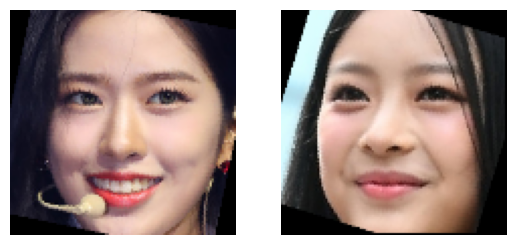

1/1 [==============================] - 0s 90ms/step
they are same person
Distance is  1.05  whereas as expected max threshold is  1.13


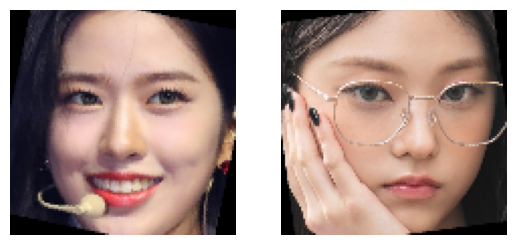

1/1 [==============================] - 0s 81ms/step
they are different persons
Distance is  1.22  whereas as expected max threshold is  1.13


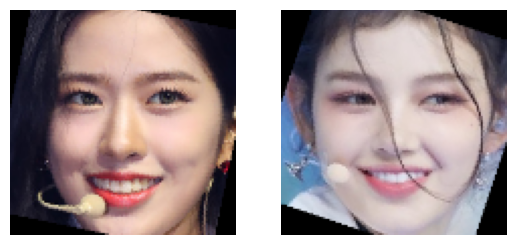

1/1 [==============================] - 0s 77ms/step
they are different persons
Distance is  1.41  whereas as expected max threshold is  1.13


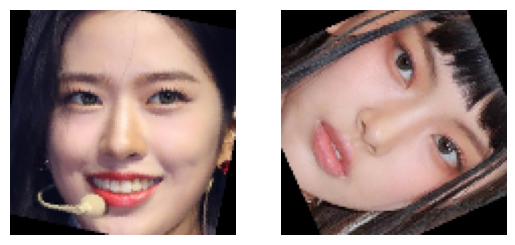

1/1 [==============================] - 0s 80ms/step
they are different persons
Distance is  1.18  whereas as expected max threshold is  1.13


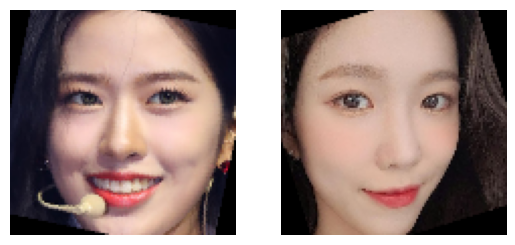

1/1 [==============================] - 0s 95ms/step
they are different persons
Distance is  1.38  whereas as expected max threshold is  1.13


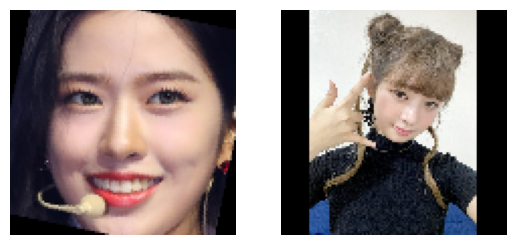

1/1 [==============================] - 0s 100ms/step
they are different persons
Distance is  1.38  whereas as expected max threshold is  1.13


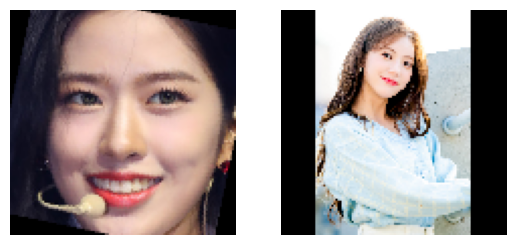

1/1 [==============================] - 0s 77ms/step
they are different persons
Distance is  1.24  whereas as expected max threshold is  1.13


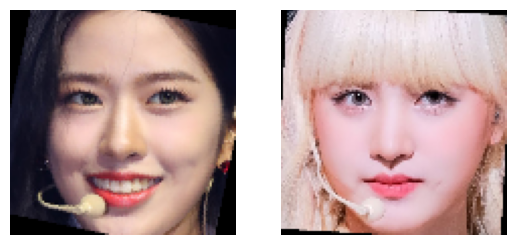

1/1 [==============================] - 0s 96ms/step
they are same person
Distance is  1.07  whereas as expected max threshold is  1.13


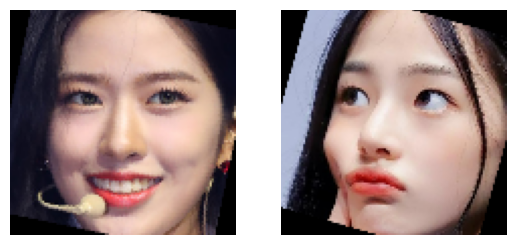

1/1 [==============================] - 0s 79ms/step
they are same person
Distance is  1.07  whereas as expected max threshold is  1.13


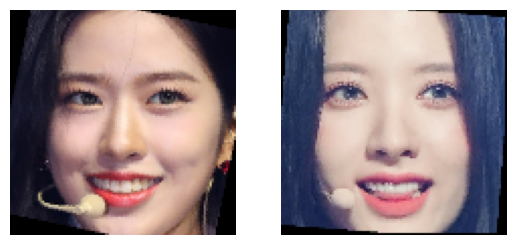

1/1 [==============================] - 0s 176ms/step
they are different persons
Distance is  1.25  whereas as expected max threshold is  1.13


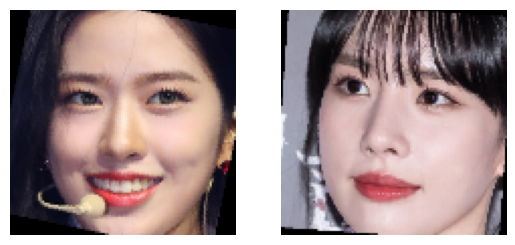

등록된 사람입니다


In [20]:

for i in img_list_extraction:
    verify(bx1,i)
    
if cert:
       print("등록된 사람입니다")
else:
    print("미등록 인원입니다")
    
cert = False

In [ ]:
list1=[]
for i in range(4):
    a="img"+str(i+1)
    list1.append(a)
    print(list1)
    

['img2']
['img2', 'img3']
['img2', 'img3', 'img4']
['img2', 'img3', 'img4', 'img5']


In [ ]:
list1
for i in list1:
    print()

img1,img1
img1,img2
img1,img3
img1,img4


1/1 [==============================] - 0s 106ms/step
they are same person
Distance is  4.1  whereas as expected max threshold is  4.16


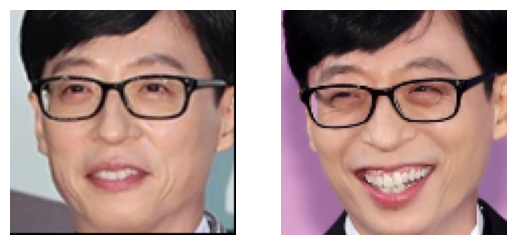

In [ ]:
verify(img1, img2)

they are same person
Distance is  2.67  whereas as expected max threshold is  4.16


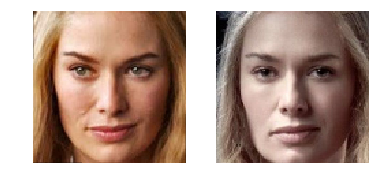

In [ ]:
verify(img3, img5)

they are same person
Distance is  3.61  whereas as expected max threshold is  4.16


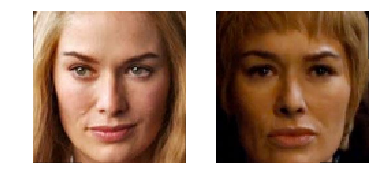

In [ ]:
verify(img3, img6)

they are same person
Distance is  3.7  whereas as expected max threshold is  4.16


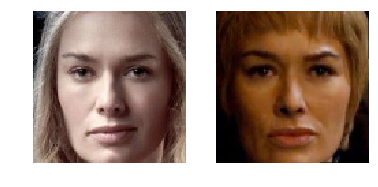

In [ ]:
verify(img5, img6)

## True negative pairs

they are different persons
Distance is  5.47  whereas as expected max threshold is  4.16


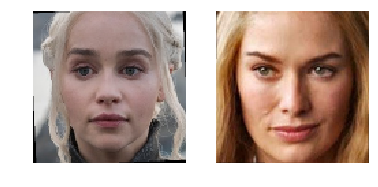

In [ ]:
verify(img1, img3)

they are different persons
Distance is  5.7  whereas as expected max threshold is  4.16


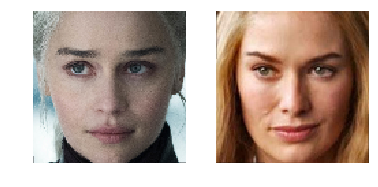

In [ ]:
verify(img2, img3)

they are different persons
Distance is  5.09  whereas as expected max threshold is  4.16


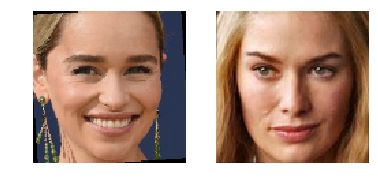

In [ ]:
verify(img4, img3)

they are different persons
Distance is  5.42  whereas as expected max threshold is  4.16


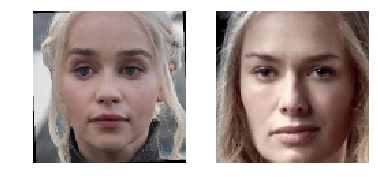

In [ ]:
verify(img1, img5)

they are different persons
Distance is  5.77  whereas as expected max threshold is  4.16


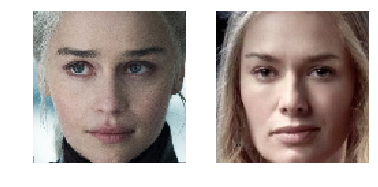

In [ ]:
verify(img2, img5)

they are different persons
Distance is  5.05  whereas as expected max threshold is  4.16


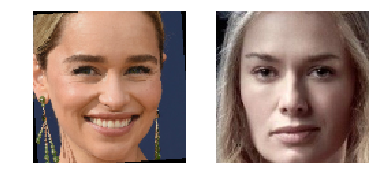

In [ ]:
verify(img4, img5)

they are different persons
Distance is  5.32  whereas as expected max threshold is  4.16


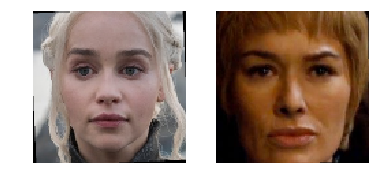

In [ ]:
verify(img1, img6)

they are different persons
Distance is  5.76  whereas as expected max threshold is  4.16


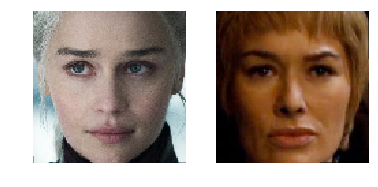

In [ ]:
verify(img2, img6)

they are different persons
Distance is  4.91  whereas as expected max threshold is  4.16


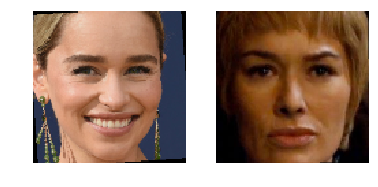

In [ ]:
verify(img4, img6)

# Running ArcFace in DeepFace

In [ ]:
#!pip install deepface
#Repo: https://github.com/serengil/deepface
from deepface import DeepFace

In [ ]:
DeepFace.verify(img1_path, img2_path, model_name="ArcFace", detector_backend='opencv', distance_metric='euclidean')

{'verified': True,
 'distance': 4.097269898822932,
 'threshold': 4.15,
 'model': 'ArcFace',
 'detector_backend': 'opencv',
 'similarity_metric': 'euclidean',
 'facial_areas': {'img1': {'x': 296, 'y': 57, 'w': 157, 'h': 157},
  'img2': {'x': 184, 'y': 164, 'w': 249, 'h': 249}},
 'time': 3.55}

In [ ]:
DeepFace.verify(img1_path, img3_path, model_name="ArcFace", detector_backend='opencv', distance_metric='euclidean')

{'verified': True,
 'distance': 4.035572313741713,
 'threshold': 4.15,
 'model': 'ArcFace',
 'detector_backend': 'opencv',
 'similarity_metric': 'euclidean',
 'facial_areas': {'img1': {'x': 296, 'y': 57, 'w': 157, 'h': 157},
  'img2': {'x': 203, 'y': 57, 'w': 137, 'h': 137}},
 'time': 0.37}